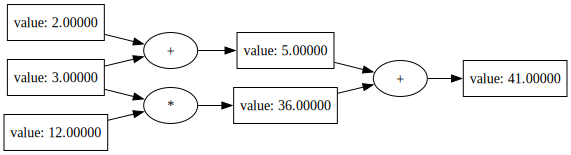

In [ ]:
from NeuralNetwork.Autograd import Scalar
from NeuralNetwork.Visualize import draw_dot

a = Scalar(2)
b = Scalar(3)
d = Scalar(12)
c = a + b + b * d
draw_dot(c)

In [ ]:
from sklearn.datasets import fetch_openml
import os
import joblib  # For saving and loading the dataset

def get_dataset(name: str = 'mnist_784'):
    """Get dataset from OpenML, checking local data folder first.

    Args:
        name (str): Name of the dataset on OpenML.
    """
    cwd: str = os.getcwd()
    data_dir = os.path.join(cwd, 'data')
    dataset_path = os.path.join(data_dir, f"{name}.joblib")  # Path to save/load dataset

    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    if os.path.exists(dataset_path):
        print(f"Loading dataset '{name}' from local file...")
        X, y = joblib.load(dataset_path)
        return X, y
    else:
        print(f"Fetching dataset '{name}' from OpenML...")
        try:
            dataset = fetch_openml(name, version=1, return_X_y=True, data_home=data_dir)
            X, y = dataset
            joblib.dump((X, y), dataset_path)  # Save the dataset
            return X, y
        except Exception as e:
            raise f"Error fetching or saving dataset: {e}"

X, y = get_dataset()
if X is not None:
    print(f"Dataset {X.shape}, {y.shape} loaded.")

Fetching dataset 'mnist_784' from OpenML...
Dataset (70000, 784), (70000,) loaded.


In [8]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
